Theta found by Batch Gradient Descent: 204.8910, 18.1485
Theta found by Statistical Gradient Descent: 215.5370, 22.9954
Theta found by Normal Equations: 205.8684, 18.2351
For temperature of 10° C,  BGD predicts 111.34

For temperature of 20° C,  BGD predicts 171.96

For temperature of 30° C,  BGD predicts 232.58



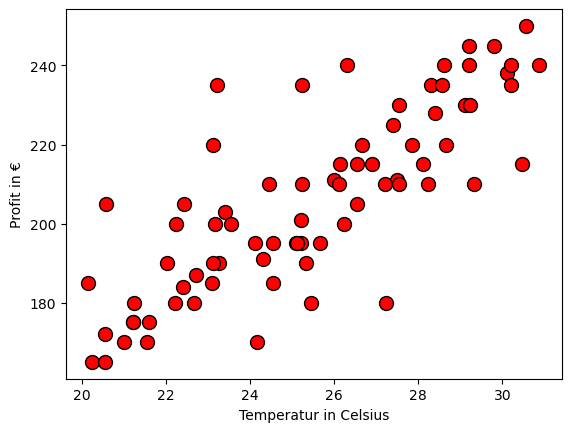

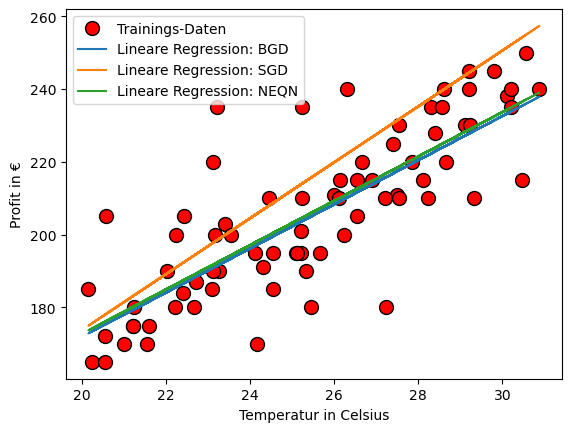

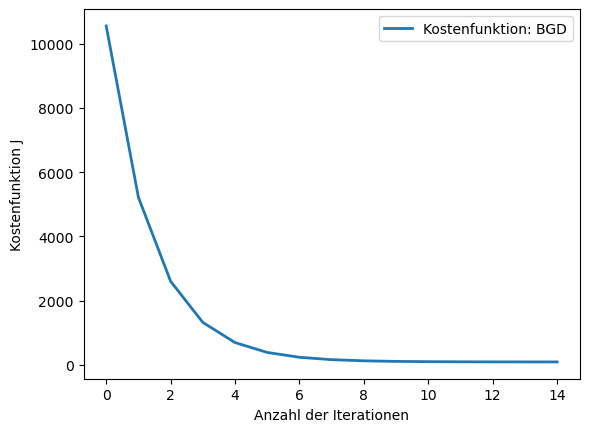

<Figure size 1500x1000 with 0 Axes>

In [2]:
# Linear Regression Methods

# IMPORT LIBRARIES------------------

import os #for directory paths
import pandas as pd #vector and matrix computations
import numpy as np #vector and matrix computations
from matplotlib import pyplot #plotting

#allows the output of matplotlib plots to be displayed directly in the notebook
%matplotlib inline


#LINEAR REGRESSION WITH 1 FEATURE------------------

#Plot-Function
def plotData(x,y):
    """
    Plotting the data.
    Parameters
    ----------
    x : vector_like
        Data point values for x-axis.

    y : vector_like
        Data point values for y-axis. Note x and y should have the same size. 
        """
    fig = pyplot.figure()
    pyplot.plot(x,y, 'ro', ms = 10, mec = 'k')

# Normalize the data    
def featureNormalize(Xtrain,Xtest):
    """
    Normalize the features of the training set to scale the values into the interval [0,1].
    Apply the transformation also to the test. Note: The normalization processs should not include 
    the test data to prevent leakage!

    Parameters
    ----------
    Xtrain : array_like
        The training dataset of shape (m x d).

    Xtest : array_like
        The test dataset of shape (m x d).
        
    Returns
    -------
    Xtrain_norm : array_like
        The normalized training dataset of shape (m x d).
    Xtest_norm : array_like
        The normalized test dataset of shape (m x d).    
    """
    # Check for constant features and remove them (Avoid constant feature normaliztion (divide by 0 issues etc.))
    feature_variances = np.var(Xtrain, axis=0) # calculate the feature variances
    constant_features = np.where(feature_variances == 0)[0]   # Identify constant features (features with zero variance)

    # Remove constant features from both the training and test sets
    constant_features = np.all(Xtrain == Xtrain[0, :], axis=0)  # check for constant values in each feature
    Xtrain = Xtrain[:, ~constant_features]
    Xtest = Xtest[:, ~constant_features]
    
    # Calculate mu and sigma
    mu = np.mean(Xtrain, axis=0)
    sigma = np.std(Xtrain, axis=0)

    # Normalize the features by subtracting the mean and dividing by the standard deviation
    Xtrain_norm = (Xtrain - mu) / sigma
    Xtest_norm = (Xtest - mu) / sigma

    return Xtrain_norm, Xtest_norm, mu, sigma
    
#Compute Cost-function based on Least Squared Error
def computeCost(X,y,theta):
    """
    Compute the square-loss cost function.
        
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x d+1), where m is the number of examples,
        and d is the number of features. We assume a vector of one's already 
        appended to the features so we have d+1 columns.
    
    y : vector_like
        The values of the function at each data point of shape (m,).
    
    theta : vector_like
        The parameters for the regression function of shape (d+1,).
            
    Returns
    -------
    J : float
        The value of the regression cost function.
    """
    #number of training examples
    m = y.size

    # initialize the cost J
    J = 0
    predictions = X.dot(theta)  # Matrix multiplication to calculate predictions
    # Compute the mean squared error
    squared_errors = np.square(predictions - y)
    J = 1 / (2*m) * np.sum(squared_errors)
    return J
 
    
# Optimization Algorithm 1: Batch Gradient Descent (BGD)
def gradientDescent(X,y,theta, alpha, num_iters):
    """Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x d+1).
    
    y : vector_like
        Value at given features of shape (m, ).
    
    theta : vector_like
        Initial values for the linear regression parameters. 
        A vector of shape (d+1, ).
    
    alpha : float
        The (hyperparameter) learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : vector_like
        The learned linear regression parameters of shape (d+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    for i in range(num_iters):
        # Compute the predicted values
        predictions = np.dot(X, theta)

        # Compute the errors (differences between predictions and actual values)
        errors = predictions - y

        # Compute the gradient for each parameter in theta
        gradients = (1 / m) * np.dot(X.T, errors)

        # Update theta using the gradients and learning rate alpha
        theta -= alpha * gradients

        # Compute the cost and append it to the history list
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

#  Optimization Algorithm 2: Stochastic Gradient Descent (SGD)
def stochasticGradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs stochastic gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x d+1).
    
    y : vector_like
        Value at given features of shape (m, ).
    
    theta : vector_like
        Initial values for the linear regression parameters. 
        A vector of shape (d+1, ).
    
    alpha : float
        The (hyperparameter) learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : vector_like
        The learned linear regression parameters of shape (d+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = []  # Use a python list to save cost in every iteration
    for i in range(num_iters):
        total_cost = 0

        # Shuffle the data to ensure randomness in each iteration
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(m):
            # Select a single training example
            x_j = X_shuffled[j]
            y_j = y_shuffled[j]

            # Compute the predicted value for the selected example
            prediction = np.dot(x_j, theta)

            # Compute the error (difference between prediction and actual value)
            error = prediction - y_j

            # Compute the gradient for the selected example
            gradient = x_j * error

            # Update theta using the gradient and learning rate alpha
            theta -= alpha * gradient

            # Accumulate the cost for this training example
            total_cost += error ** 2

        # Compute the cost for this iteration and append it to the history list
        J_history.append(total_cost / m)

    return theta, J_history

#  Optimization Algorithm 3: Normal Euqations
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x d+1).
    
    y : vector_like
        The value at each data point of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (d+1, ).
    """
    theta = np.zeros(X.shape[1])
    
    # Compute the closed-form solution using the normal equations
    X_transpose = X.T
    X_transpose_X = np.dot(X_transpose, X)
    X_transpose_X_inv = np.linalg.pinv(X_transpose_X)
    theta = np.dot(np.dot(X_transpose_X_inv, X_transpose), y)
    
    return theta


# Test the Code

#Load the data from the Textfile 'data.txt'
data = np.loadtxt(os.path.join('Data', 'data_lr.txt'), delimiter= ',')
X,y = data[:,0], data[:,1]

#number of training examples
m = y.size 

# Transform 1D Feature vector to 2d array for calculations
X = X.reshape(-1, 1)

# call featureNormalize on the loaded data
X_norm, _, mu, sigma = featureNormalize(X, X)

# Add a column of ones to X to account for the intercept term
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

theta = np.zeros(2)
iterations = 15
alpha = 0.3

# plot the Data
plotData(X,y)
pyplot.ylabel('Profit in €')
pyplot.xlabel('Temperatur in Celsius')
pyplot.savefig('data.png')

# Results: Batch Gradient Descent 
thetaBGD, J_history_BGD = gradientDescent(X_norm,y,theta, alpha, iterations)
print('Theta found by Batch Gradient Descent: {:.4f}, {:.4f}'.format(*thetaBGD))
# Results: Statistical Gradient Descent 
thetaSGD, J_history_SGD = stochasticGradientDescent(X_norm,y,theta, alpha, iterations)
print('Theta found by Statistical Gradient Descent: {:.4f}, {:.4f}'.format(*thetaSGD))
# Results: Normal Equations 
thetaNEQN = normalEqn(X_norm,y)
print('Theta found by Normal Equations: {:.4f}, {:.4f}'.format(*thetaNEQN))



# plot the linear fit 
plotData(X,y)
pyplot.plot(X, np.dot(X_norm,thetaBGD), '-')
pyplot.plot(X, np.dot(X_norm,thetaSGD), '-')
pyplot.plot(X, np.dot(X_norm,thetaNEQN), '-')
pyplot.legend(['Trainings-Daten', 'Lineare Regression: BGD','Lineare Regression: SGD','Lineare Regression: NEQN' ]);
pyplot.ylabel('Profit in €')
pyplot.xlabel('Temperatur in Celsius')
pyplot.savefig('datafit.png')

# Plot the convergence graph
fig = pyplot.figure()
pyplot.plot(np.arange(len(J_history_BGD)), J_history_BGD, lw=2)
pyplot.legend(['Kostenfunktion: BGD']);
pyplot.xlabel('Anzahl der Iterationen')
pyplot.ylabel('Kostenfunktion J')
pyplot.savefig('datafit_cost.png')


# Predict values for new Testdata: 10, 20 and 30 °C
X_test = np.array([[10],
                  [20],
                  [30]])
# normalize the test data
X_test_norm = (X_test - mu) / sigma
X_test_norm = np.concatenate([np.ones((3, 1)), X_test_norm], axis=1)
predict_BGD = np.dot(X_test_norm, thetaBGD)

print('For temperature of 10° C,  BGD predicts {:.2f}\n'.format(predict_BGD[0])) 
print('For temperature of 20° C,  BGD predicts {:.2f}\n'.format(predict_BGD[1])) 
print('For temperature of 30° C,  BGD predicts {:.2f}\n'.format(predict_BGD[2])) 

pyplot.figure(figsize=(15,10));


